**MD MAHADI HASAN**

1. Generate a sample of 100 observations drawn from a normal distribution with mean of 2 and standard deviation of .5. Plot the result using a histogram.

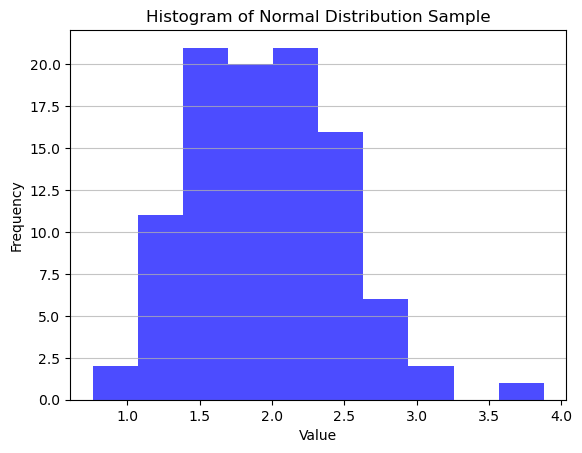

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters for the normal distribution
mean = 2
std_dev = 0.5

# Generate a sample of 100 observations
sample = np.random.normal(mean, std_dev, 100)

# Plot the histogram of the sample
plt.hist(sample, bins=10, alpha=0.7, color='blue')
plt.title('Histogram of Normal Distribution Sample')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()


2. Create a cumulative sum from the values created in the previous exercise. Plot the result. Does the data appear to follow a trend? Explain.

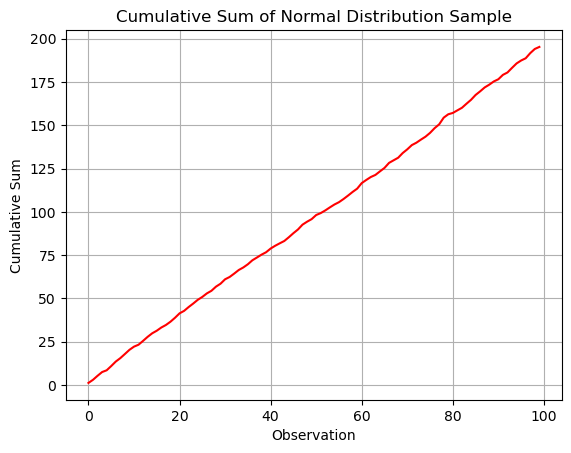

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the cumulative sum of the sample
cumulative_sum = np.cumsum(sample)

# Plot the cumulative sum
plt.plot(cumulative_sum, color='red')
plt.title('Cumulative Sum of Normal Distribution Sample')
plt.xlabel('Observation')
plt.ylabel('Cumulative Sum')
plt.grid(True)

# Show the plot
plt.show()


3. Choose 9 stocks of your choice and create a notebook with the same visualizations. Provide similar explanations in regard to the meaning of statistics and the shape of each stocks distribution.

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


In [14]:
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NFLX', 'BABA', 'JPM']
data = yf.download(stocks, start="2022-01-01", end="2023-01-01")['Adj Close']


[*********************100%%**********************]  9 of 9 completed


In [15]:
daily_returns = data.pct_change().dropna()


In [16]:
# Calculate mean, median, variance, and standard deviation
stats = daily_returns.agg(['mean', 'median', 'var', 'std'])

# Calculate skewness and kurtosis
stats.loc['skewness'] = skew(daily_returns)
stats.loc['kurtosis'] = kurtosis(daily_returns)

# Display the statistics
print(stats)


Ticker        AAPL      AMZN       BABA     GOOGL       JPM       META  \
mean     -0.001074 -0.002329  -0.000207 -0.001689 -0.000448  -0.003262   
median   -0.001360 -0.002927  -0.006081 -0.002278 -0.001108  -0.002408   
var       0.000505  0.000997   0.002207  0.000595  0.000354   0.001645   
std       0.022471  0.031571   0.046974  0.024396  0.018806   0.040555   
skewness  0.324108  0.247258   2.161800  0.184557  0.259699  -1.491066   
kurtosis  1.034385  3.001165  14.637541  0.899975  0.725901  11.771520   

Ticker        MSFT       NFLX      TSLA  
mean     -0.001049  -0.001760 -0.003847  
median   -0.001834  -0.005899 -0.001146  
var       0.000497   0.001956  0.001694  
std       0.022289   0.044222  0.041155  
skewness  0.144760  -2.087889 -0.141172  
kurtosis  0.837058  16.589988  0.127089  


**AAPL**: Slightly negative average return, low volatility, and distribution leans towards the right with more extreme values.
**AMZN:** Negative returns, with slightly higher volatility than AAPL, more frequent extreme positive returns.
**BABA:** Negative returns, high volatility, very frequent extreme positive returns.
**GOOGL:** Slightly negative returns, moderate volatility, leans towards more extreme positive returns.
**JPM:** Negative returns, moderate volatility, and the least likelihood of extreme returns in either direction.
**META:** Negative returns, high volatility, and a very high likelihood of extreme returns.
**MSFT:** Slightly negative returns, low volatility, less extreme returns.
**NFLX:** Negative returns, very high volatility, and the most likelihood of extreme returns in either direction.
**TSLA:** Slightly negative returns, moderate volatility, less extreme returns.

[*********************100%%**********************]  9 of 9 completed


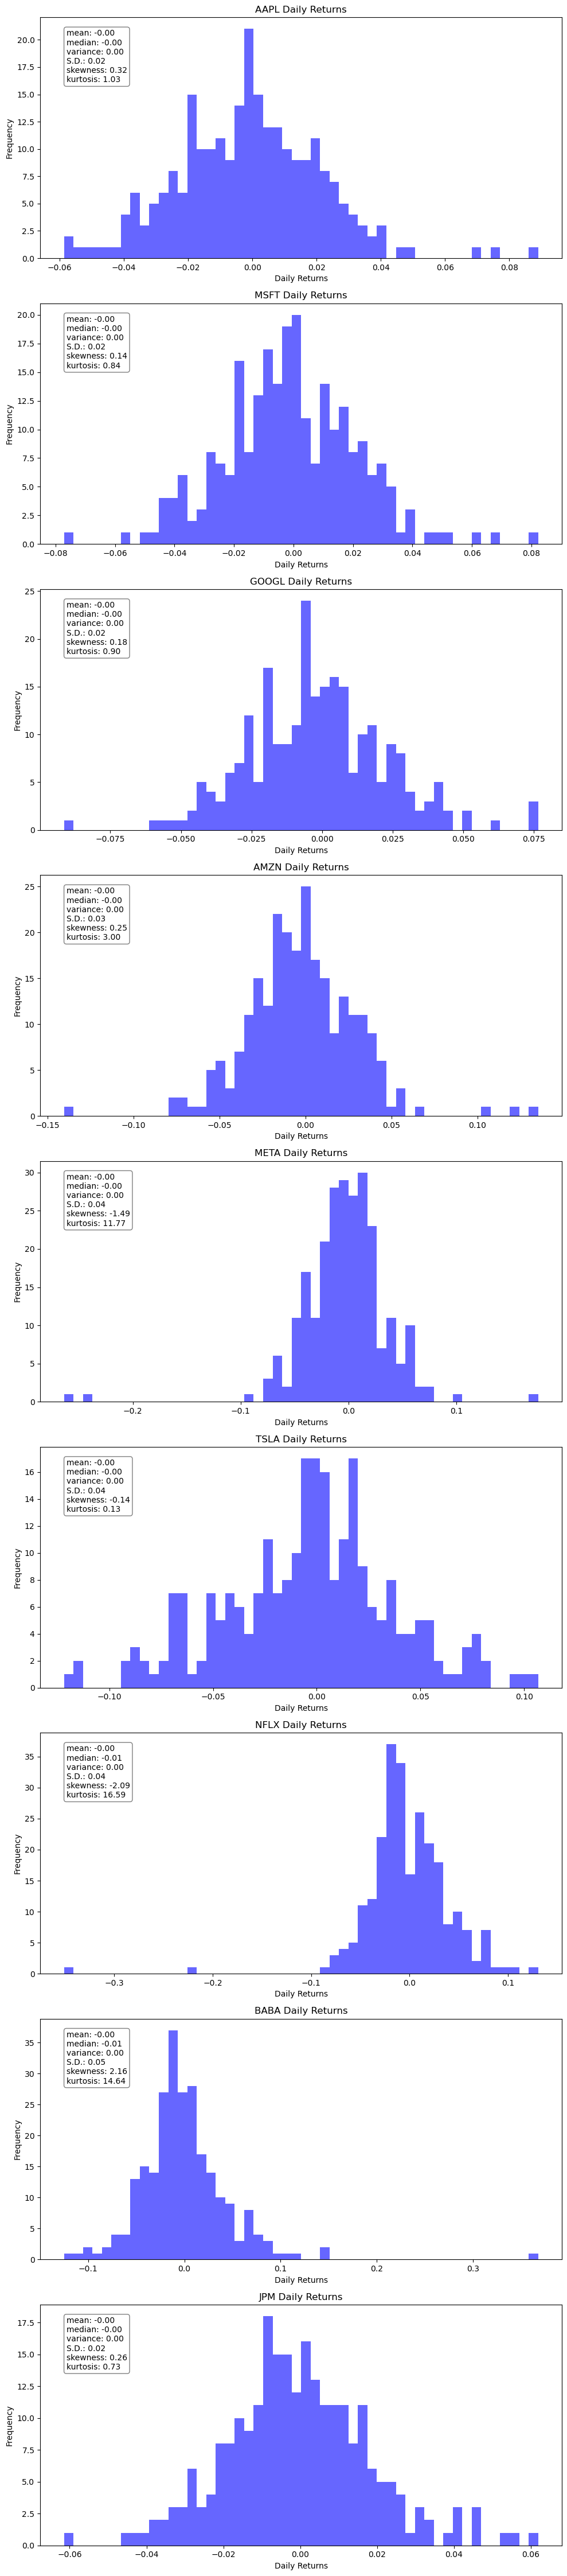

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import skew, kurtosis

# Replace 'FB' with 'META' and fetch the data
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NFLX', 'BABA', 'JPM']
data = yf.download(stocks, start="2022-01-01", end="2023-01-01")['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Define a function to add statistics to the plots
def add_stats_to_plot(ax, stock, stats):
    textstr = '\n'.join((
        f'mean: {stats["mean"]:.2f}',
        f'median: {stats["median"]:.2f}',
        f'variance: {stats["var"]:4.2f}',
        f'S.D.: {stats["std"]:4.2f}',
        f'skewness: {stats["skewness"]:.2f}',
        f'kurtosis: {stats["kurtosis"]:.2f}'))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)

# Create subplots
fig, axs = plt.subplots(len(stocks), figsize=(10, 5 * len(stocks)))

# Flatten the array of axes if necessary
if len(stocks) > 1:
    axs = axs.flatten()
else:
    axs = [axs]

# Loop through each stock and create a plot
for ax, stock in zip(axs, stocks):
    # Calculate statistics
    stats = {
        "mean": np.mean(daily_returns[stock]),
        "median": np.median(daily_returns[stock]),
        "var": np.var(daily_returns[stock]),
        "std": np.std(daily_returns[stock]),
        "skewness": skew(daily_returns[stock]),
        "kurtosis": kurtosis(daily_returns[stock])
    }

    # Create histogram
    ax.hist(daily_returns[stock], bins=50, alpha=0.6, color='blue')

    # Add stats to plot
    add_stats_to_plot(ax, stock, stats)

    # Set title and labels
    ax.set_title(f'{stock} Daily Returns')
    ax.set_xlabel('Daily Returns')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


#### Histogram Explnation:

**Mean:** The average daily return; here, as the graph shows, most are hovering around 0, indicating no strong upward or downward trend on average.
**Median:** This is the midpoint of the data and is also around 0 for most stocks, which supports the findings from the mean.
**Variance:** It's relatively low for most, suggesting that returns typically don't deviate far from the mean.
**Standard Deviation (S.D.):** Smaller numbers indicate less volatility.
**Skewness** Reflects asymmetry. Values closer to zero suggest a more symmetrical distribution of returns. Significant skewness in some stocks indicates a tail on one side.
**Kurtosis** Indicates whether the data has heavy or light tails compared to a normal distribution. A kurtosis greater than 3 (excess kurtosis) suggests a distribution with heavier tails, which can signal a higher risk of extreme returns.